In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("linear_regression_dataset.csv")

In [4]:
df

,Feature1,Feature2,Feature3,Category,Name,Target
0,54.967142,72.642384,62,A,Alice,371.099650
1,48.617357,64.446117,63,B,Charlie,299.184743
2,56.476885,61.820944,25,C,Bob,319.605931
3,65.230299,62.149045,56,C,Alice,348.440917
4,47.658466,41.569469,33,C,Bob,201.644393
...,...,...,...,...,...,...
200,54.967142,72.642384,62,A,Alice,371.099650
201,48.617357,64.446117,63,B,Charlie,299.184743
202,56.476885,61.820944,25,C,Bob,319.605931
203,65.230299,62.149045,56,C,Alice,348.440917


In [5]:
df.head()

,Feature1,Feature2,Feature3,Category,Name,Target
0,54.967142,72.642384,62,A,Alice,371.099650
1,48.617357,64.446117,63,B,Charlie,299.184743
2,56.476885,61.820944,25,C,Bob,319.605931
3,65.230299,62.149045,56,C,Alice,348.440917
4,47.658466,41.569469,33,C,Bob,201.644393


In [6]:
df.describe()

,Feature1,Feature2,Feature3,Target
count,195.000000,197.000000,205.000000,205.000000
mean,51.725409,49.832424,50.034146,305.490298
std,24.359855,17.719284,28.767046,240.690454
min,23.802549,20.650259,1.000000,121.224365
25%,42.917977,36.249935,26.000000,241.666343
50%,49.734861,50.680544,51.000000,282.653683
75%,54.967142,65.052264,75.000000,319.605931
max,276.097078,79.430309,99.000000,2517.322809


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  195 non-null    float64
 1   Feature2  197 non-null    float64
 2   Feature3  205 non-null    int64  
 3   Category  205 non-null    object 
 4   Name      205 non-null    object 
 5   Target    205 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 9.7+ KB


In [8]:
df.isnull()

,Feature1,Feature2,Feature3,Category,Name,Target
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
200,False,False,False,False,False,False
201,False,False,False,False,False,False
202,False,False,False,False,False,False
203,False,False,False,False,False,False


In [9]:
df.isnull().sum()

Feature1    10
Feature2     8
Feature3     0
Category     0
Name         0
Target       0
dtype: int64

In [10]:
for col in df.columns:
    if df[col].dtype=='object':
        df=df.fillna(df[col].mode())
    else:
        df=df.fillna(df[col].mean())

In [11]:
df.isnull().sum()

Feature1    0
Feature2    0
Feature3    0
Category    0
Name        0
Target      0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(5)

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

np.int64(0)

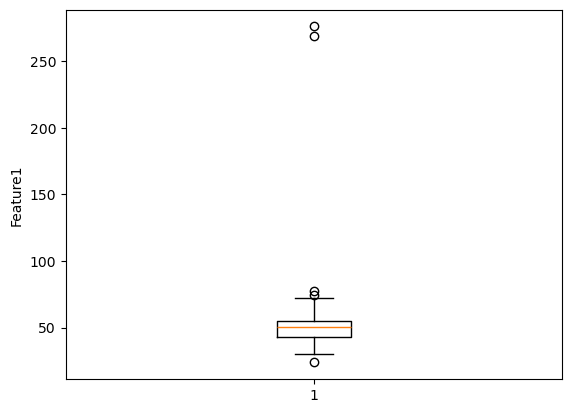

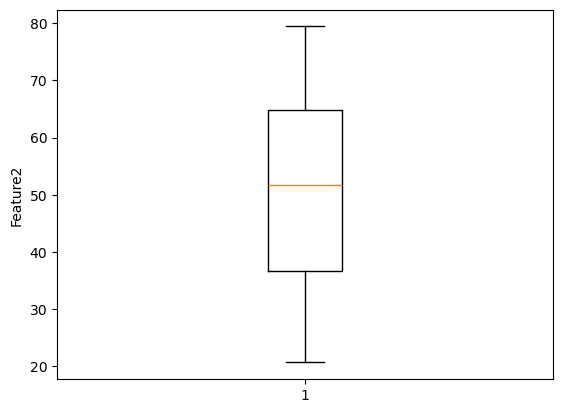

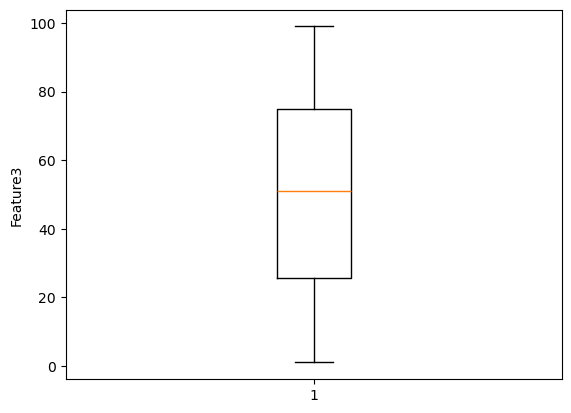

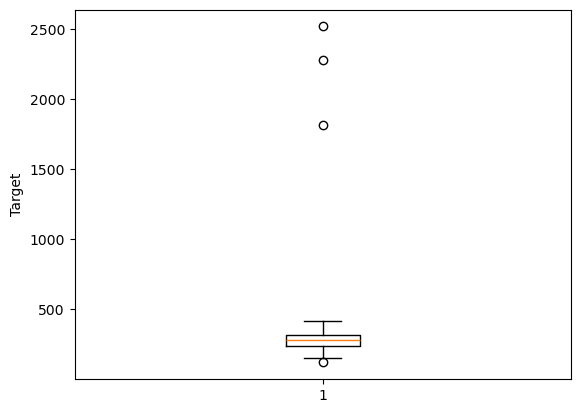

In [15]:
for col in df.columns:
    if df[col].dtype!=object:
        plt.boxplot(df[col])
        plt.ylabel(col)
        plt.show()


In [16]:
list=['Feature1','Target']
for col in list:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)

    IQR=Q3-Q1

    LB=Q1-1.5*IQR
    UB=Q3+1.5*IQR

    df=df[(df[col]>=LB)&(df[col]<=UB)]
    

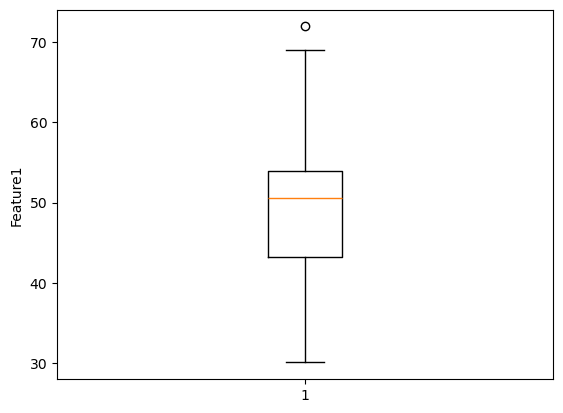

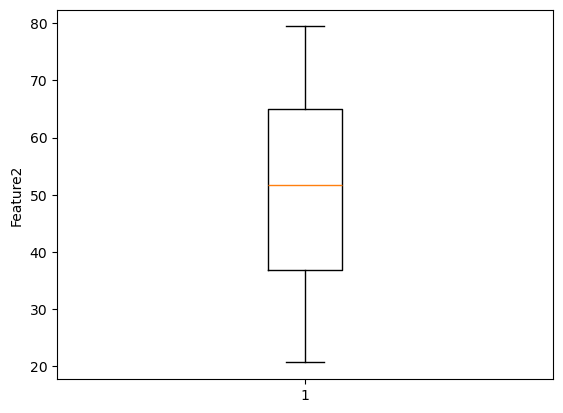

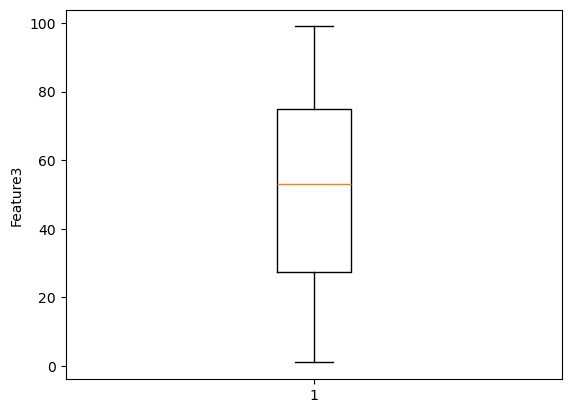

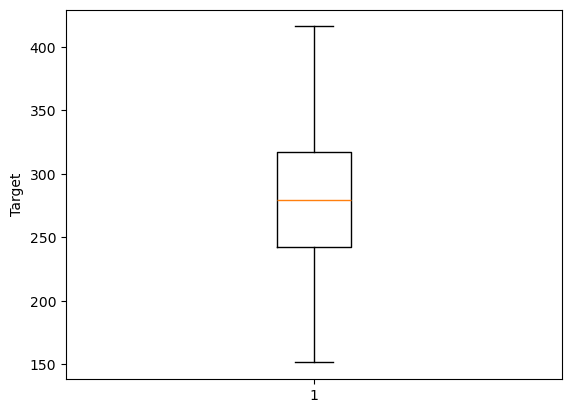

In [17]:
for col in df.columns:
    if df[col].dtype!=object:
        plt.boxplot(df[col])
        plt.ylabel(col)
        plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le=LabelEncoder()

In [20]:
for col in df.columns:
    if df[col].dtype==object:
        df[col]=le.fit_transform(df[col])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191 entries, 0 to 199
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  191 non-null    float64
 1   Feature2  191 non-null    float64
 2   Feature3  191 non-null    int64  
 3   Category  191 non-null    int64  
 4   Name      191 non-null    int64  
 5   Target    191 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 10.4 KB


In [22]:
df.head()

,Feature1,Feature2,Feature3,Category,Name,Target
0,54.967142,72.642384,62,0,0,371.099650
1,48.617357,64.446117,63,1,2,299.184743
2,56.476885,61.820944,25,2,1,319.605931
3,65.230299,62.149045,56,2,0,348.440917
4,47.658466,41.569469,33,2,1,201.644393


In [23]:
x=df.drop('Target',axis=1)

In [24]:
y=df['Target']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=45)

In [27]:
x_train

,Feature1,Feature2,Feature3,Category,Name
36,52.088636,23.100903,12,1,0
154,52.930725,60.351107,38,2,1
4,47.658466,41.569469,33,2,1
176,50.130019,25.090263,56,0,2
168,47.546119,57.093084,79,1,0
...,...,...,...,...,...
99,47.654129,52.737007,6,1,2
34,58.225449,57.373429,57,1,2
129,44.965243,66.584778,39,1,0
137,46.779385,74.153174,54,0,2


In [28]:
x_test

,Feature1,Feature2,Feature3,Category,Name
3,65.230299,62.149045,56,2,0
13,30.867198,58.997836,47,2,0
106,68.861859,26.046680,53,1,2
147,36.795434,77.003718,14,1,3
140,52.274599,39.202976,94,0,1
181,41.428424,76.834915,88,2,1
26,38.490064,21.830015,14,2,1
135,65.499344,65.272572,12,0,1
145,57.818229,25.477201,79,2,1
150,52.504929,57.910233,51,2,2


In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
le=LinearRegression()

In [31]:
le.fit(x_train,y_train)

LinearRegression()

In [32]:
predict=le.predict(x_test)

In [33]:
from sklearn.metrics import r2_score

In [34]:
r2_score(y_test,predict)*100

68.82374727387437

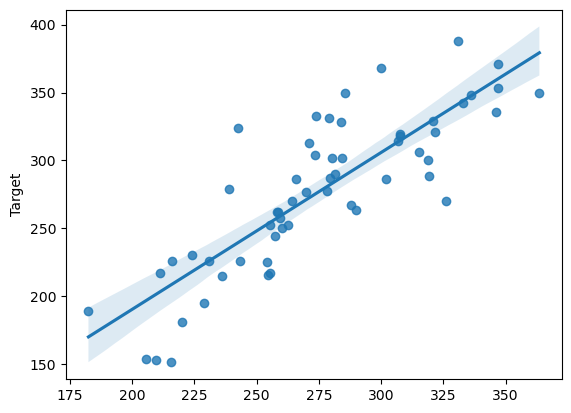

In [36]:
sns.regplot(x=predict,y=y_test)
plt.show()